In [1]:
%matplotlib inline
import matplotlib as plt
from urllib2 import urlopen
from zipfile import ZipFile
import pylab as pyl
import pandas as pd
import os
import csv
import shutil

In [2]:
download =  'https://www.ssa.gov/oact/babynames/names.zip'
request = urlopen( download )
#save
output = open("baby_names_data.zip", "w")
output.write(request.read())
output.close()

In [2]:
#check that the zip file has been downloaded
current_dir = os.getcwd()
print current_dir
for file in os.listdir(current_dir):
    print file

/Users/home/Google Drive/Data_vis_projects/baby_names_git_repo
.git
.ipynb_checkpoints
baby_names_data.zip
babynamesf-1a.ipynb
babynamesf.ipynb
babynamesf2.ipynb
data
NationalReadMe.pdf
README.md
top10-f.csv


In [5]:
unzip the babynames zipfile and check that they are all there
os.makedirs("./data")
zf = ZipFile('baby_names_data.zip')
zf.extractall("./data")
print os.listdir(current_dir+'/data')[0:10]


['NationalReadMe.pdf', 'yob1880.txt', 'yob1881.txt', 'yob1882.txt', 'yob1883.txt', 'yob1884.txt', 'yob1885.txt', 'yob1886.txt', 'yob1887.txt', 'yob1888.txt']


Now I am going to make a list of files in the current directory by using os module walk(). I will print out only the first ten elements of the list.

In [3]:
file_list = []
for root, dirs, files in os.walk(current_dir+'/data'):
    for filename in files:
        if filename.endswith('txt'):
            file_list.append(filename)
print file_list[0:10]

['yob1880.txt', 'yob1881.txt', 'yob1882.txt', 'yob1883.txt', 'yob1884.txt', 'yob1885.txt', 'yob1886.txt', 'yob1887.txt', 'yob1888.txt', 'yob1889.txt']


For each file in our file_list make a pandas data frame. The read_csv() method takes a comma delimited file and outputs a data frame. Names of each column can be assigned with names = ['column1', 'column2', 'column3'].

We only want the females from each data frame so we can index on a column using .ix.

Finally, set the index of each data frame to be the 'name' of the person instead of the default 0,1,2 etc. 

In [4]:
for file in file_list:
    data_df = pd.read_csv('data/'+file, names=['name','sex', 'counts'])
    data_df_f = data_df.ix[data_df.sex == 'F']
    data_df_f_index = data_df_f.set_index('name')
data_df_f_index[0:10]

,sex,counts
name,,
Emma,F,20355
Olivia,F,19553
Sophia,F,17327
Ava,F,16286
Isabella,F,15504
Mia,F,14820
Abigail,F,12311
Emily,F,11727
Charlotte,F,11332


Now make a csv file of the top 10 female names for each year. The format will be: year, name, total_counts

In [10]:
file_open = open('top10-f.csv', 'wb')
file_out = csv.writer(file_open)
for file in file_list:
    data_df = pd.read_csv('data/'+file, names=['name', 'sex', 'counts'])
    data_df_f = data_df.ix[data_df.sex == 'F']
    data_df_f_index = data_df_f.set_index('name')
    data_df_dict = data_df_f_index['counts'].to_dict()
    name_count_list = []
    for key, value in data_df_dict.items():
        name_count_list.append((value, key))
        name_count_list.sort()
        top_ten_f_sorted = name_count_list[-10:]
        top_ten_f_sorted.insert(0, int(file[3:7]))
    top_ten_f_updated = [str(i).strip('(').strip(')').replace('"', '')\
    for i in top_ten_f_sorted]
    file_out.writerow(top_ten_f_updated)
file_open.close()


    

I used the dictionary items() method (data_df_dict.items()) to run through the key, value pairs in the dictionary produced from each file. I then made a list of tuples, each one consisting of a key, value pair where key = 'name' and value = 'counts'. But I wanted value to be first so I entered (value, key). This way I can use the list sort() method to sort the list on counts. I then slice the ordered list so that I take the top ten elements consisting of count and name. Finaly, I insert the year of each file into the list at the first position by slicing the file name so that just the year shows up (top_ten_f_sorted.insert(0. int(file[3:7]).
I now have a list of tuples consisting of the year followed by the top ten counts, name [year, count1, name1, count2, name2]. I then use the writerow() method of csvwriter to write out each list from each file as as a row in the file I opened earlier.

Now make a name list for names in the top 10 and a year list.

In [2]:
file_in2 = open('top10-f.csv', 'r')
name_list = []
year = []
for row in file_in2:
    row = row.replace('"', '').strip('\n').strip().split(',')
    year.append(row[0])
    for name in row[2::2]:
        if name not in name_list:
            name_list.append(name)
file_in2.close()
print len(year)
print len(name_list)
print year[-1]
print name_list[-1]

136
85
2015
 'Harper'


Next we will create a scatterplot and heat map. But first we need to create two empty lists that we will add to in the 'for-loop'. We will then iterate through each row in the 'top10-f.csv' file. For every row we will want to remove the quotes using the string replace() method and strip the new lines using the string strip() method. The string can then be converted to a list of elements seperated by commas using the split() method.

'year.append(row[0])' will append the first element of each list which is the year to to the year list.

In every list (representing each row of the file) the names start at index = 2 and appear every second element. So we can use list slicing with a stride of 2 to ask if every second name is in the name_list. If the name is not yet in the list, 'name_list.append(name)' will append it to the list. This ensures that we only get each unique name once since there are many duplicates in the csv file.

Next we want to make scatterplots of each name using counts as the y-axis and year as the x-axis. It would also be cool to make a heatmap visualizing the number of times a person has been in the top10 over time. I can do this in two nested loops. I want to use the name_list to find the indices for creating another list giving the number of times a name appears for a particular year. For fun we are also going to make a list of the max number of times each person is in the top 10.
We will use the enumerate() function to make a tuple of names and their index. This could take a while.

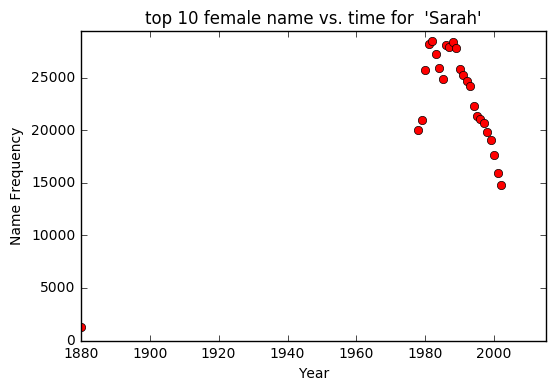

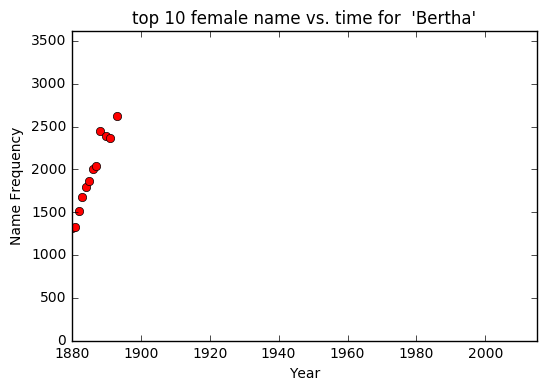

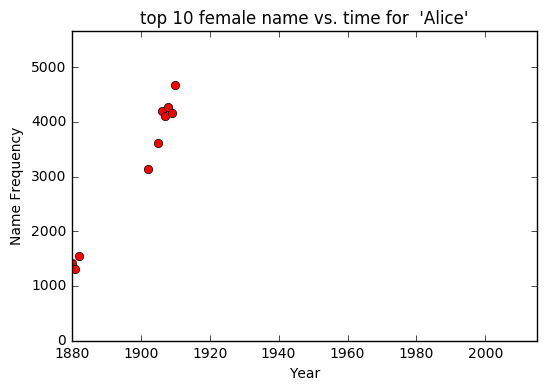

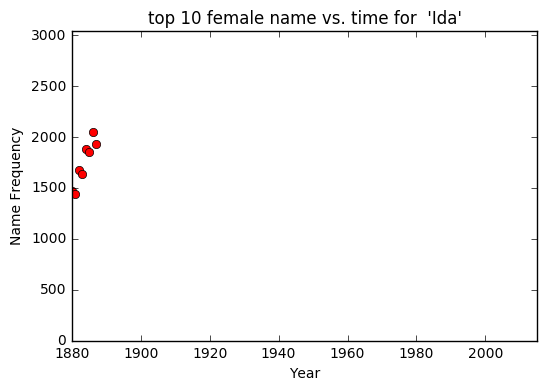

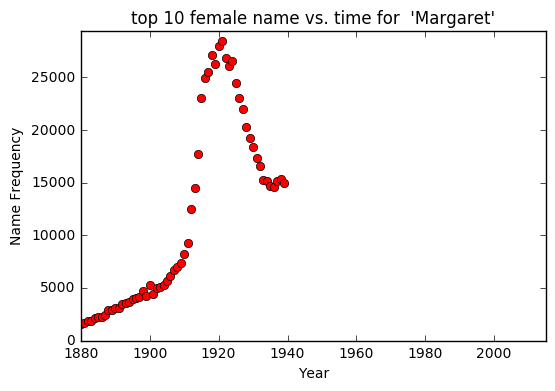

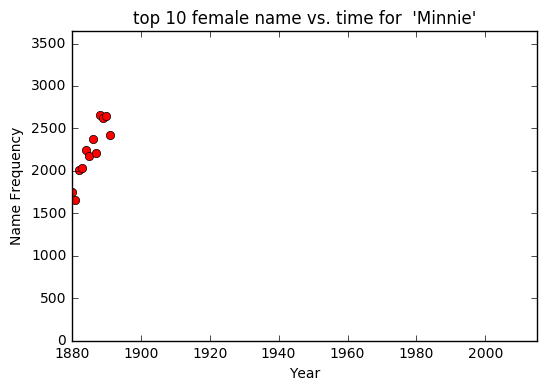

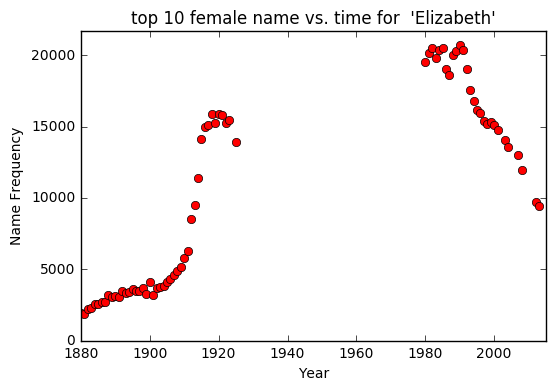

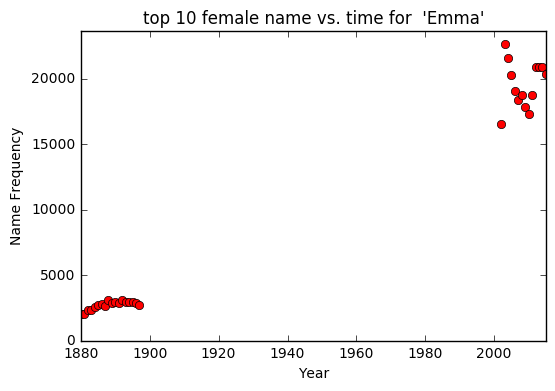

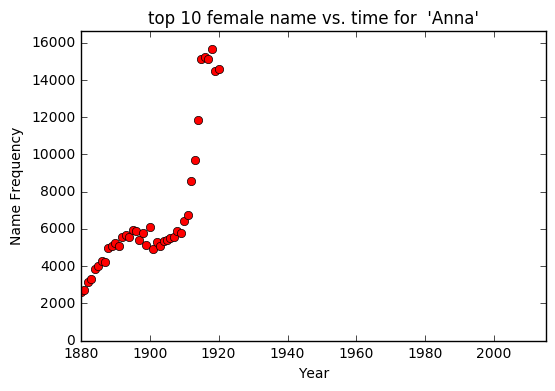

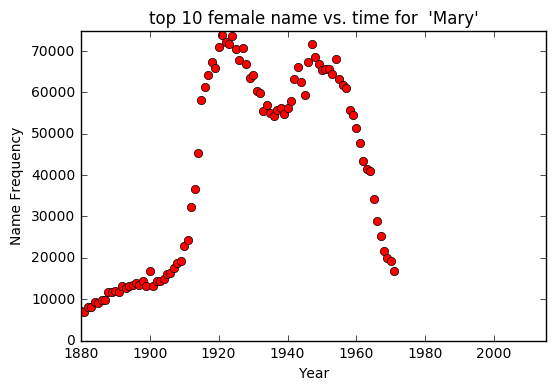

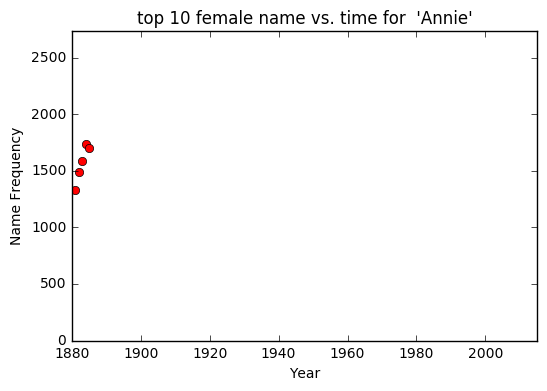

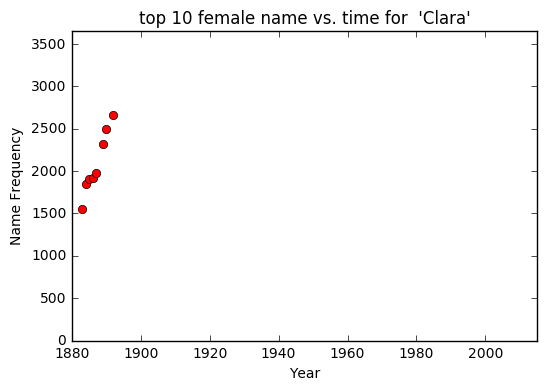

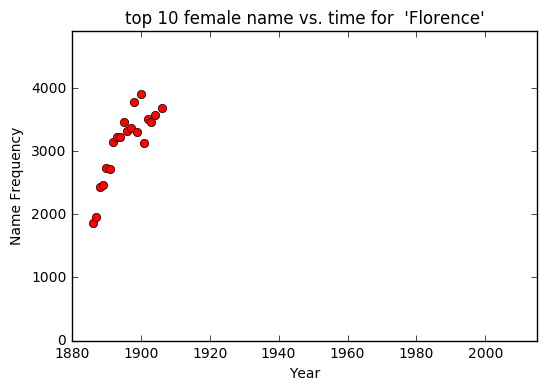

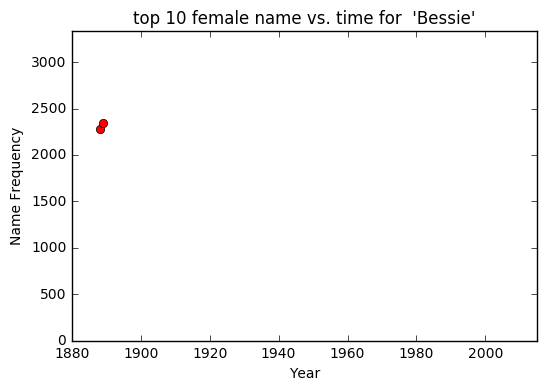

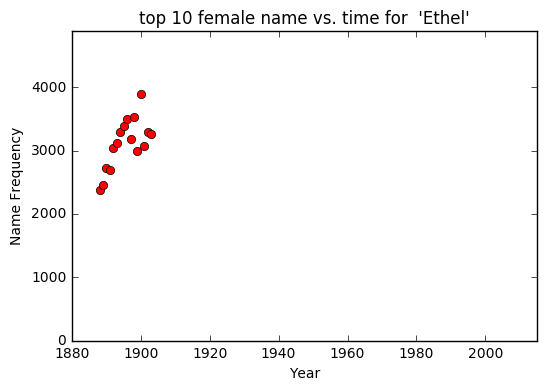

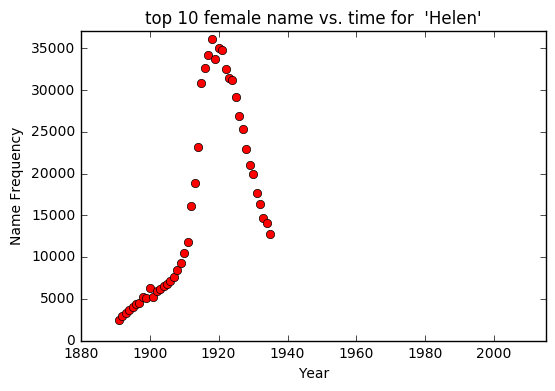

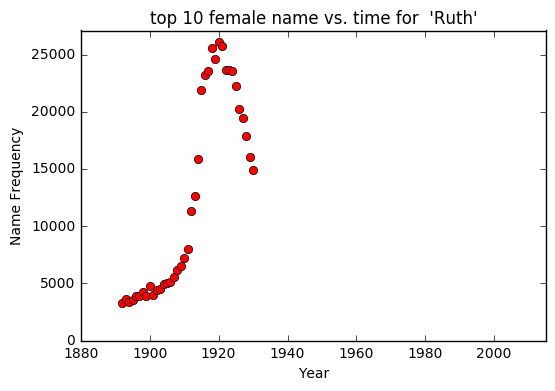

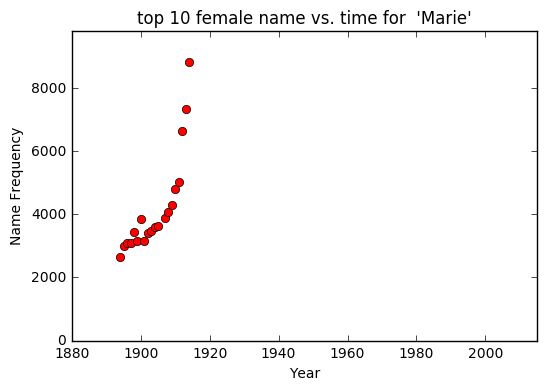

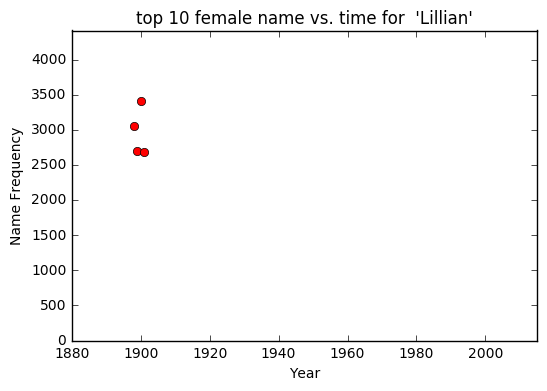

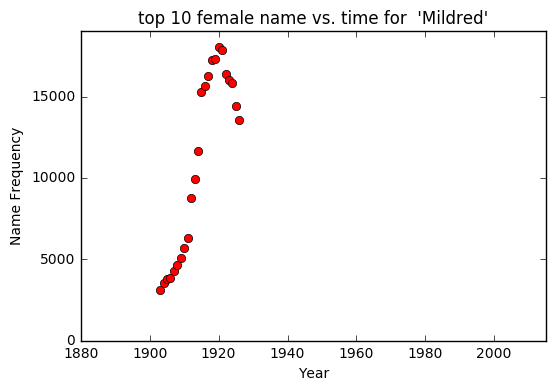

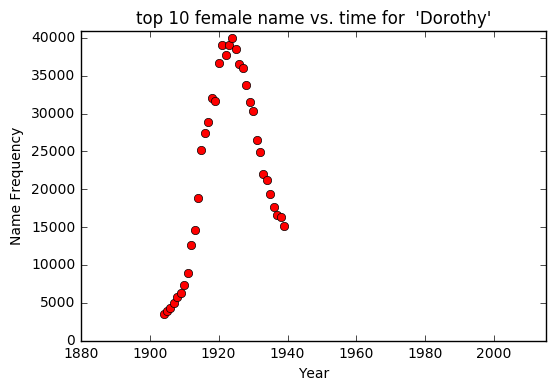

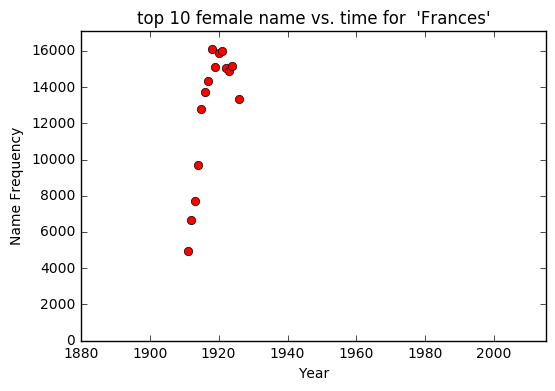

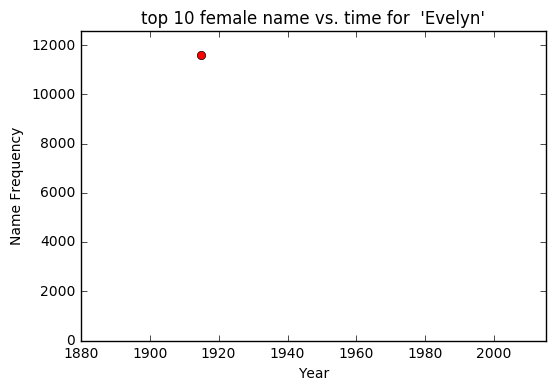

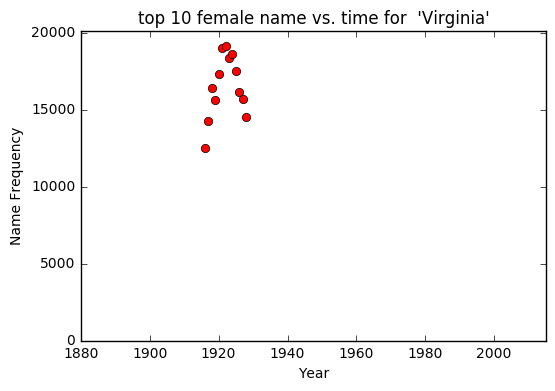

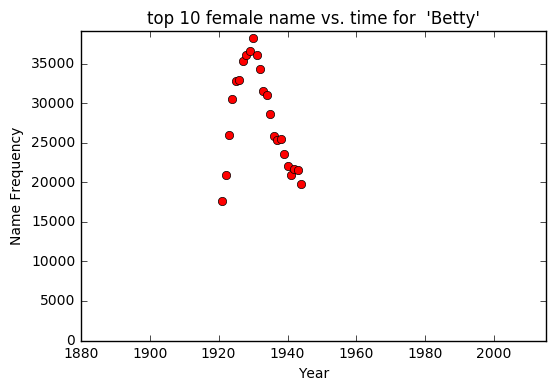

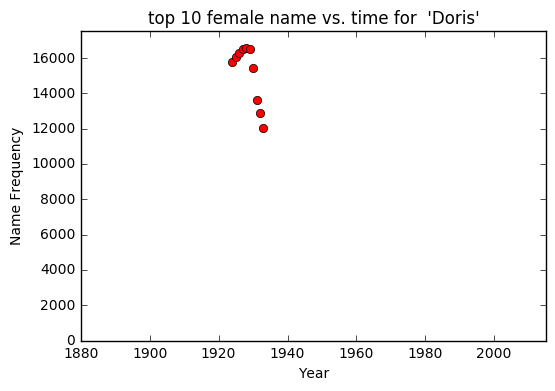

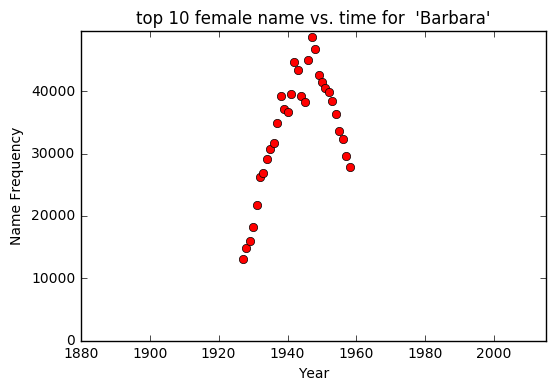

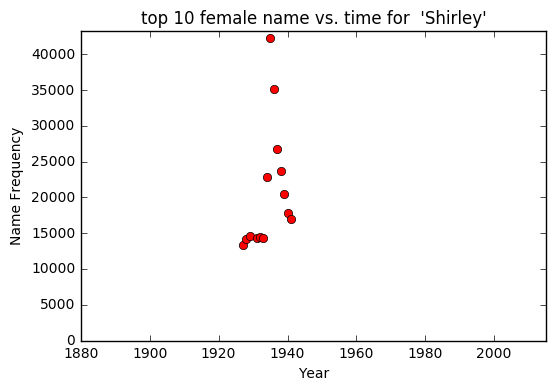

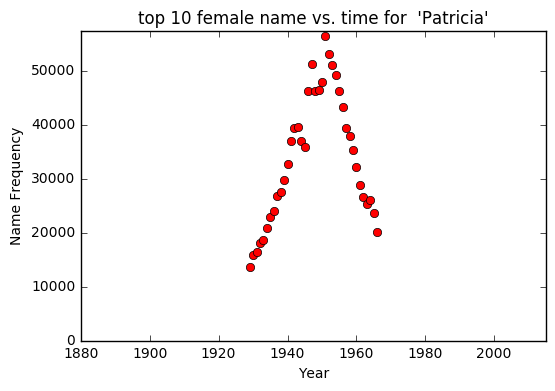

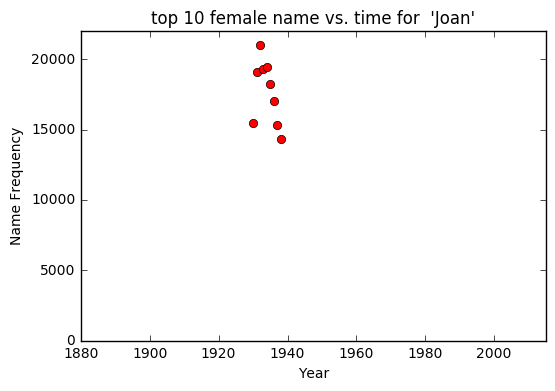

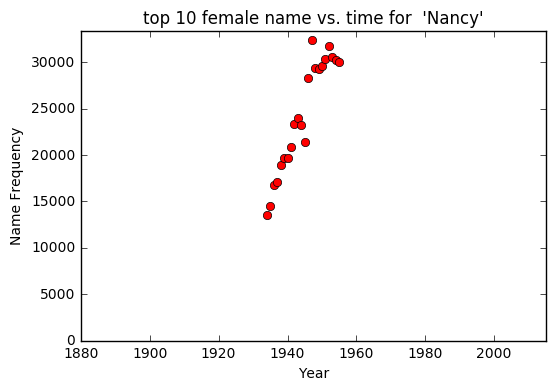

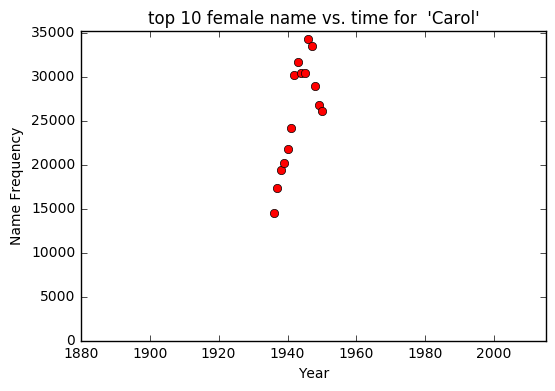

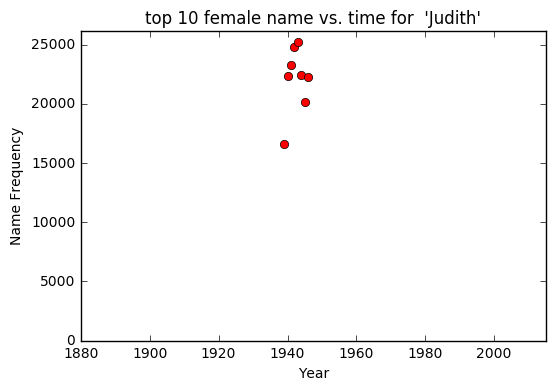

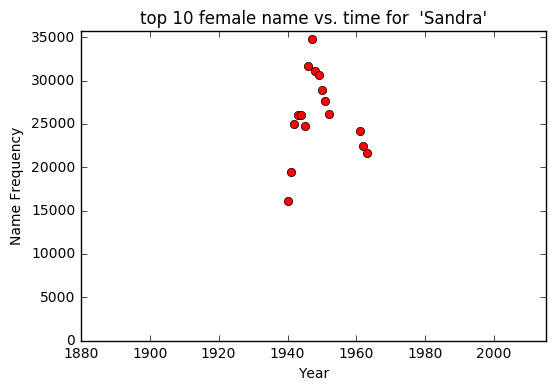

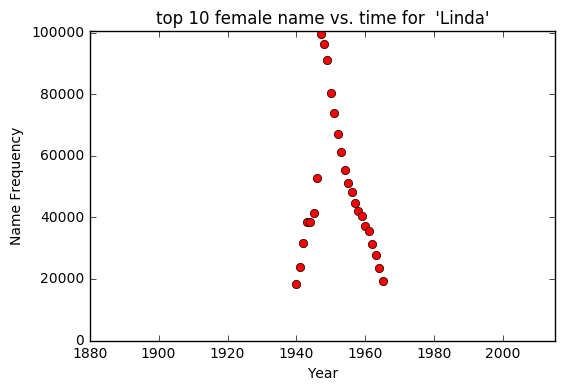

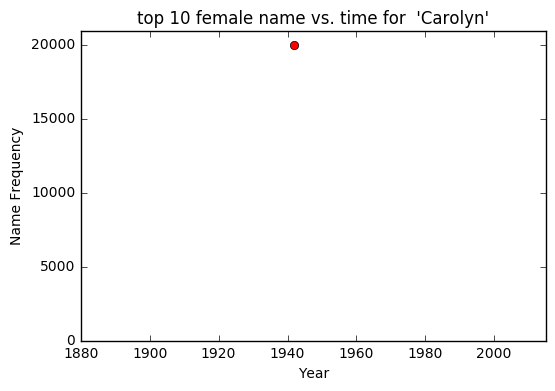

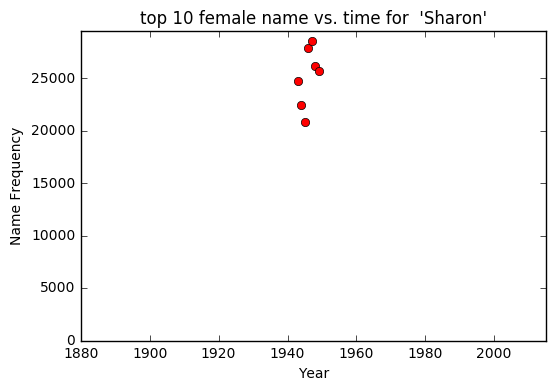

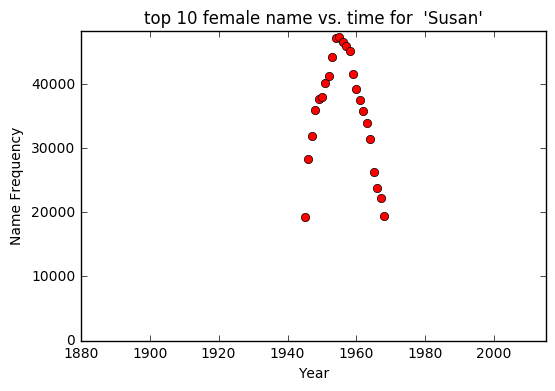

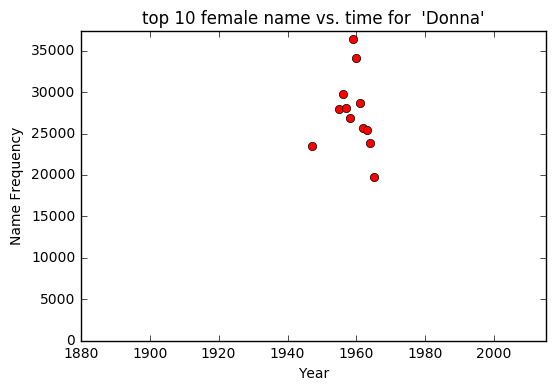

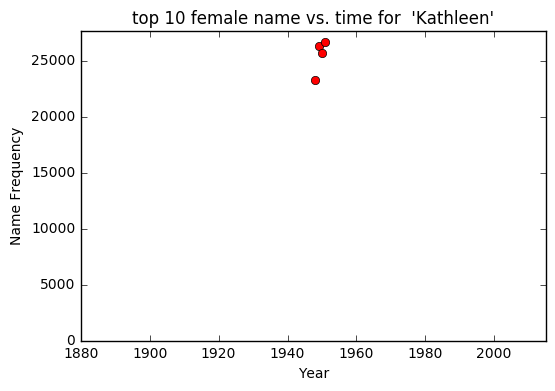

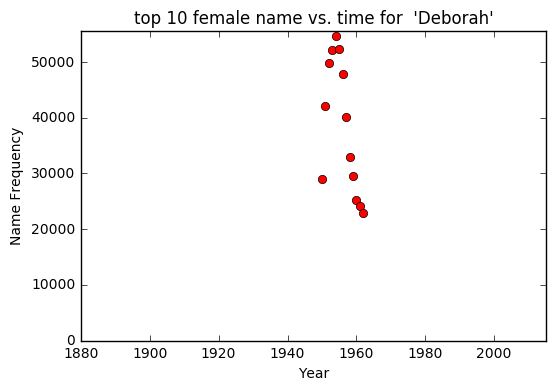

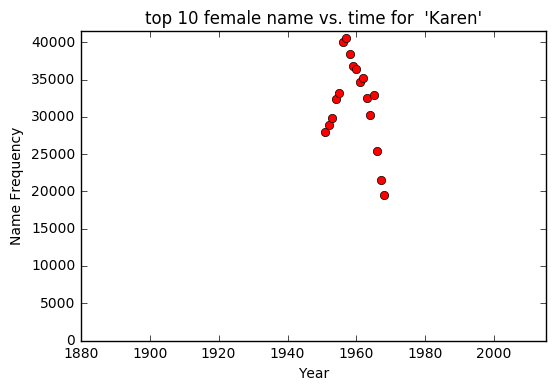

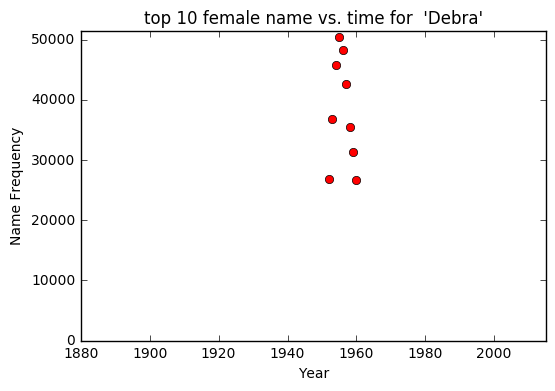

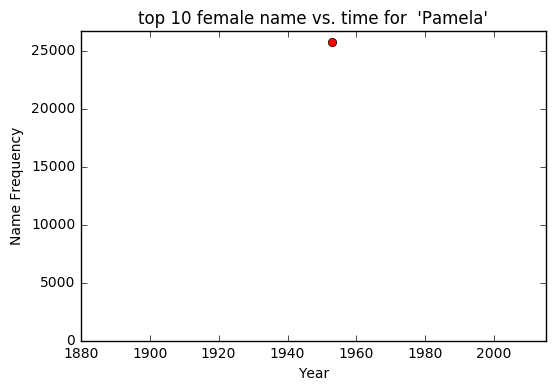

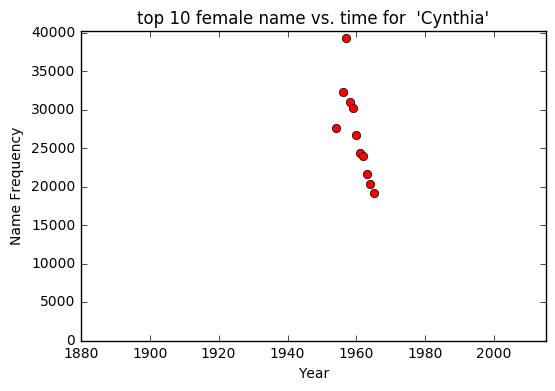

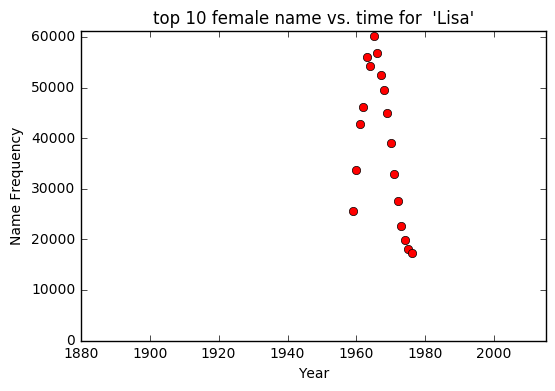

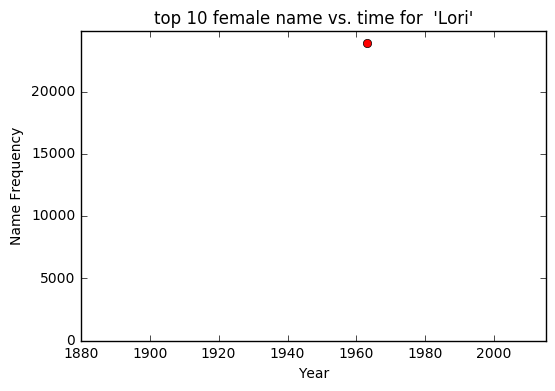

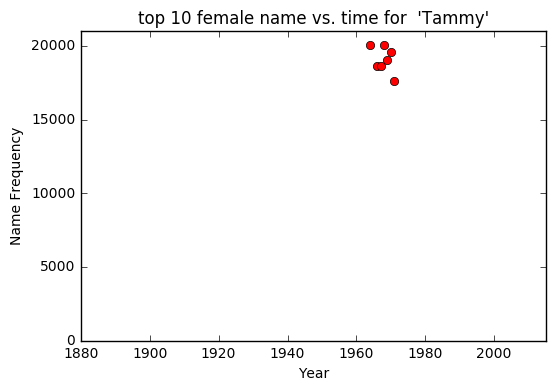

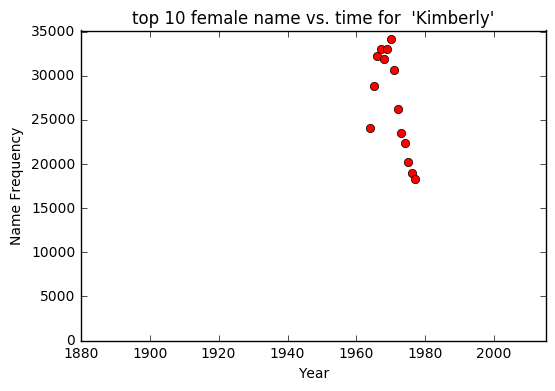

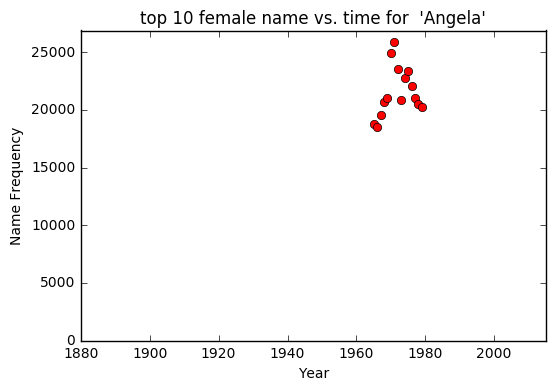

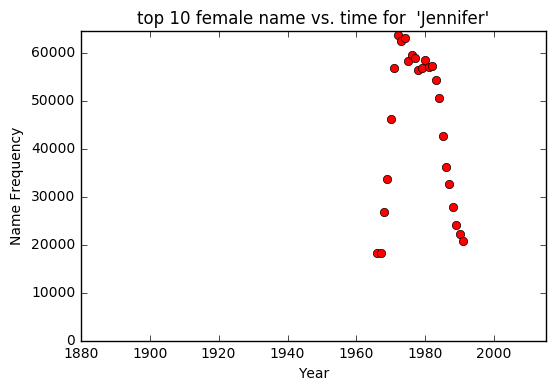

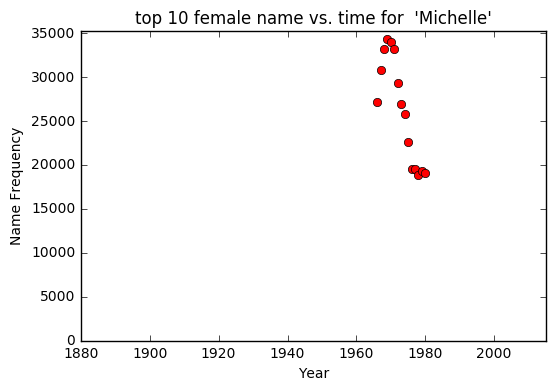

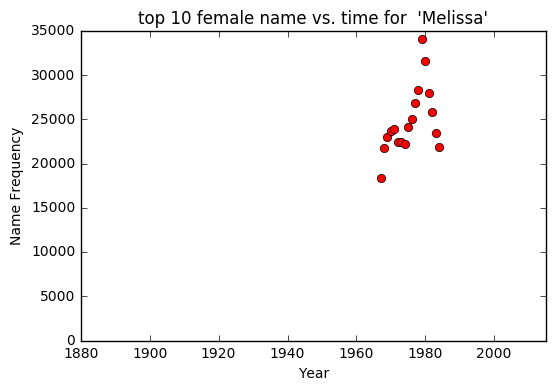

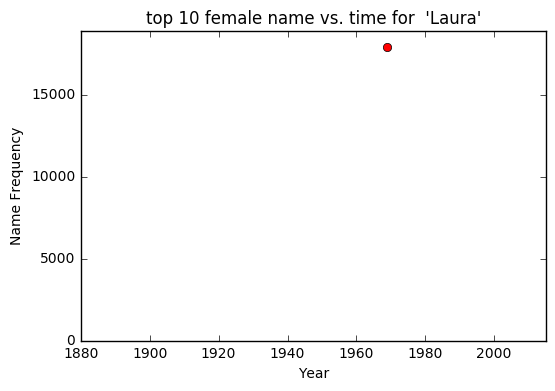

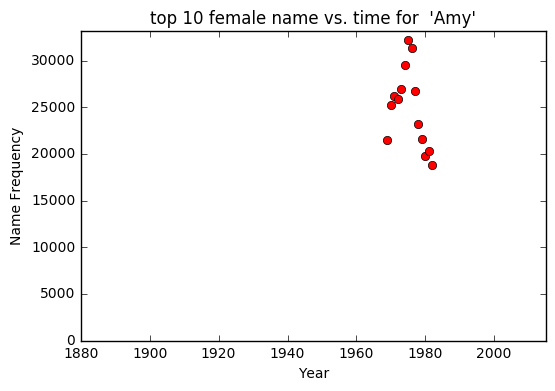

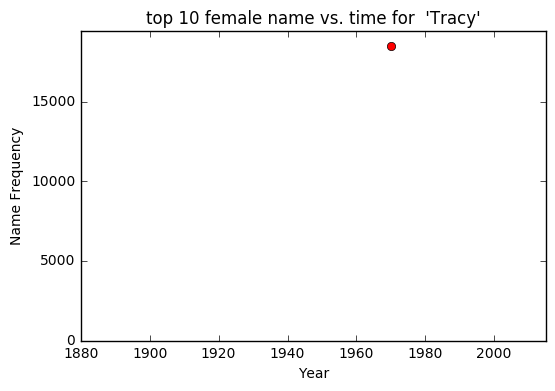

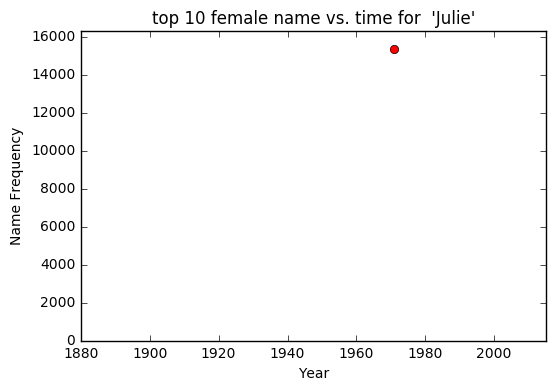

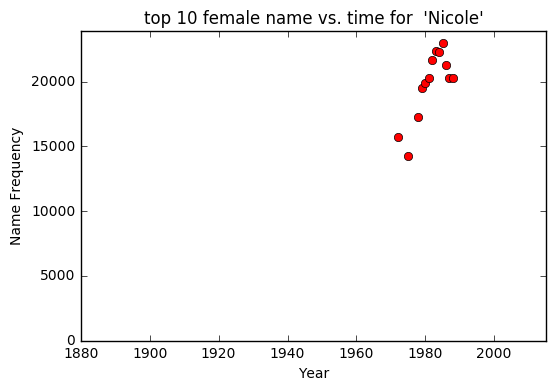

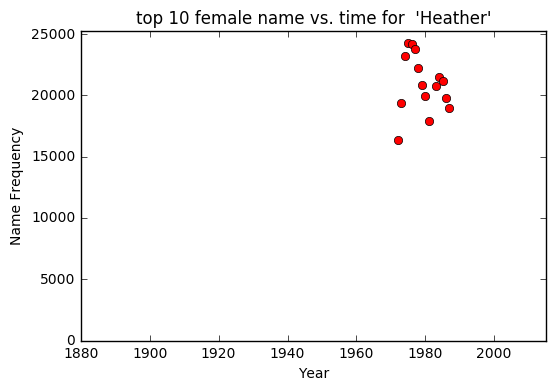

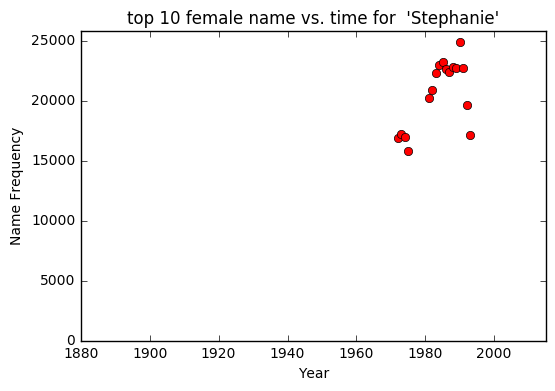

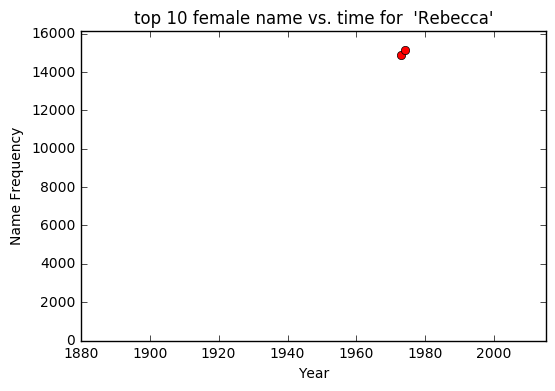

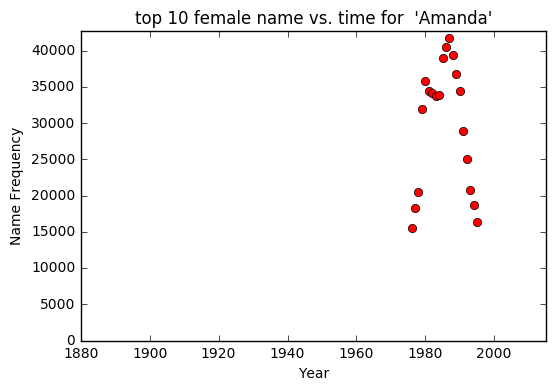

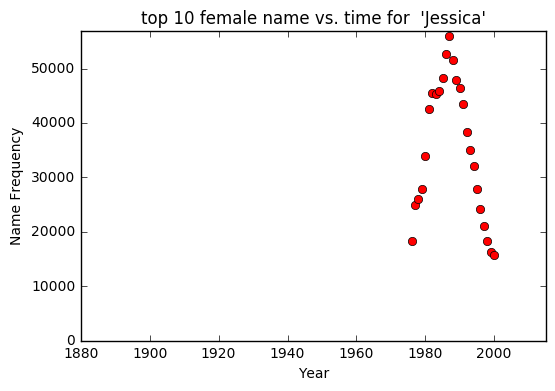

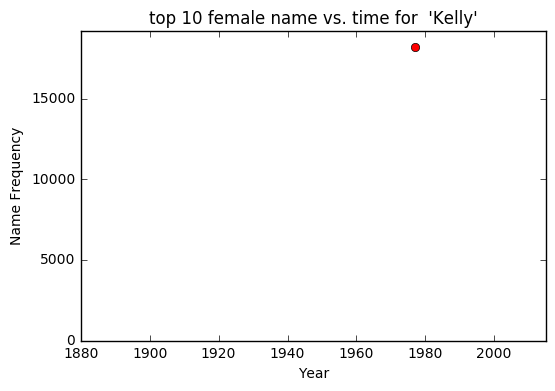

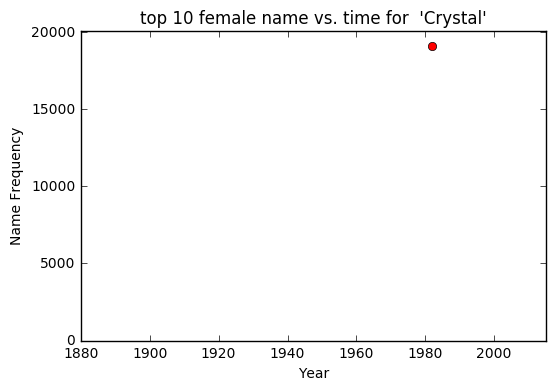

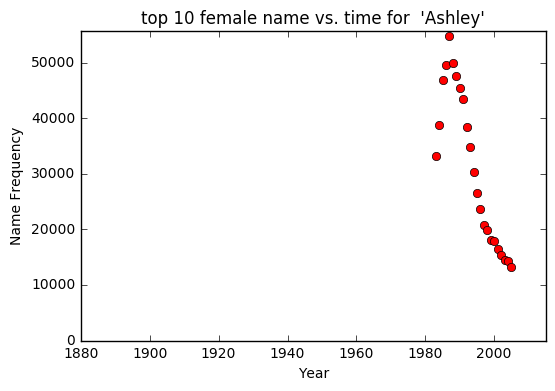

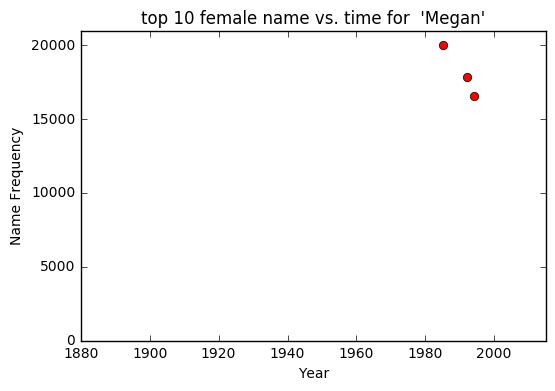

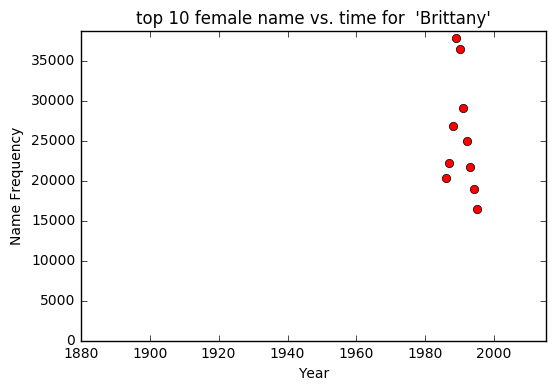

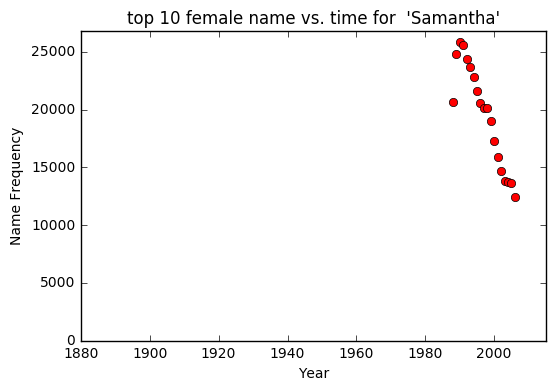

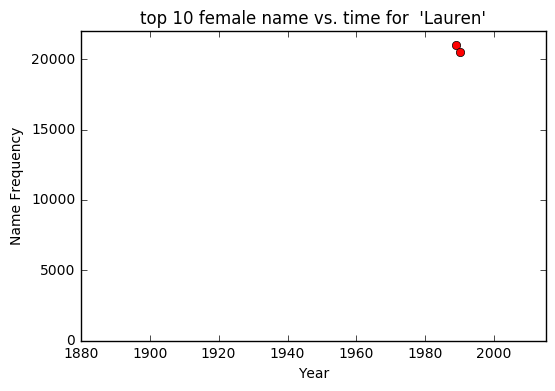

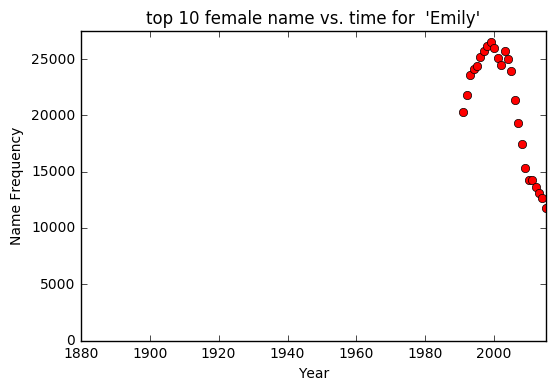

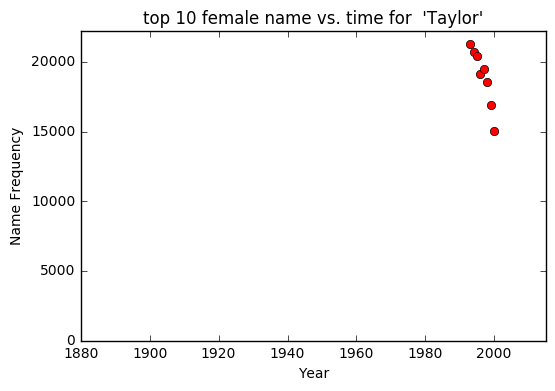

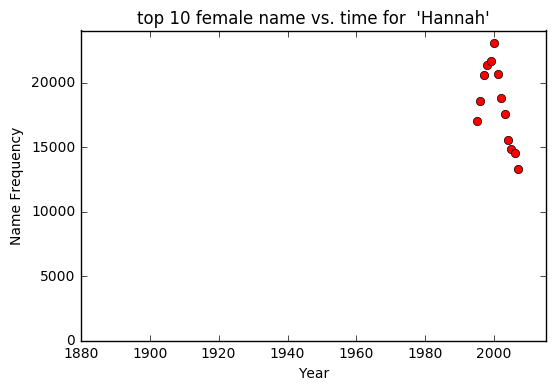

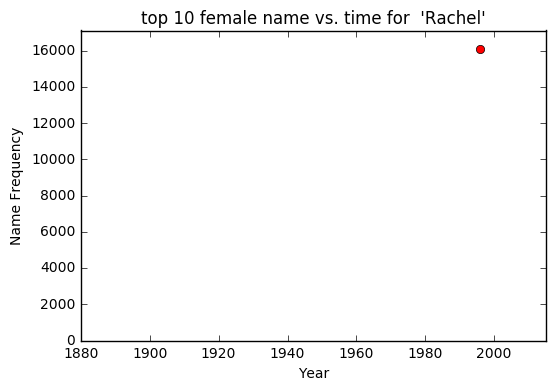

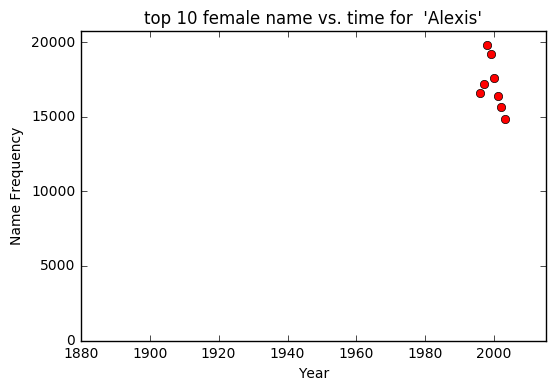

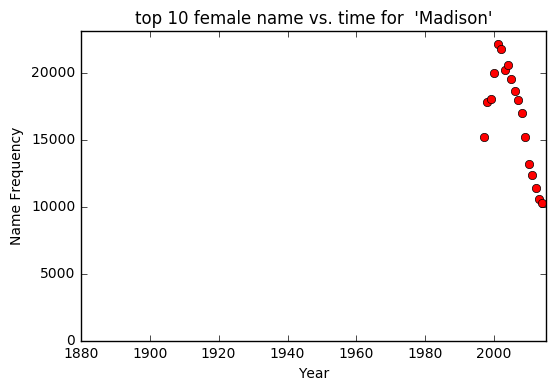

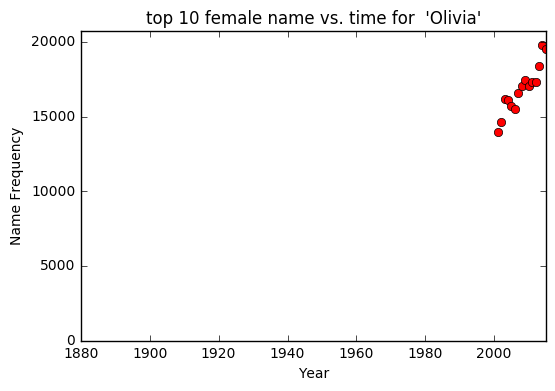

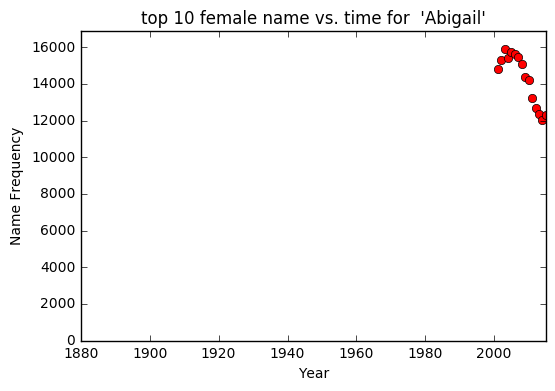

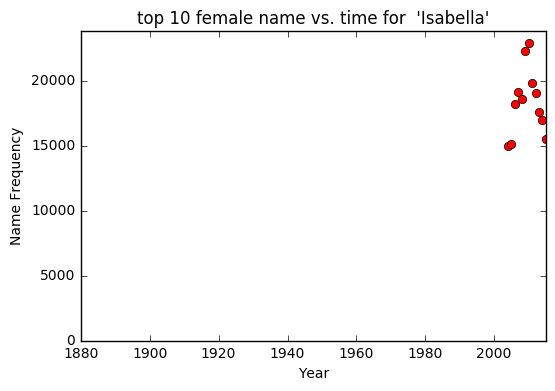

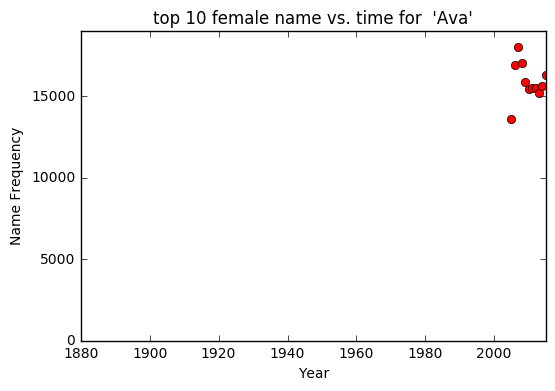

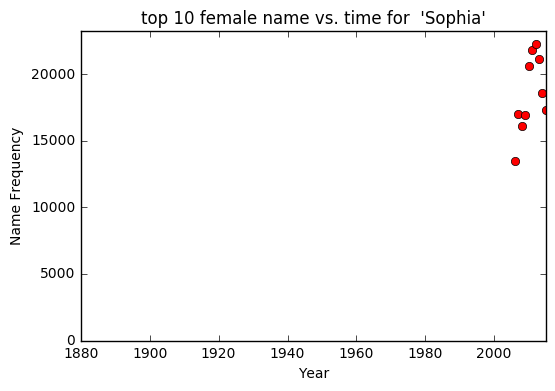

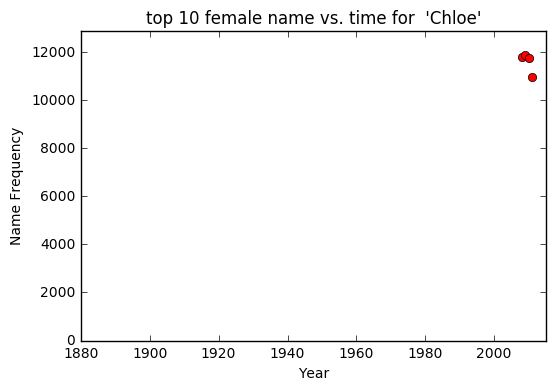

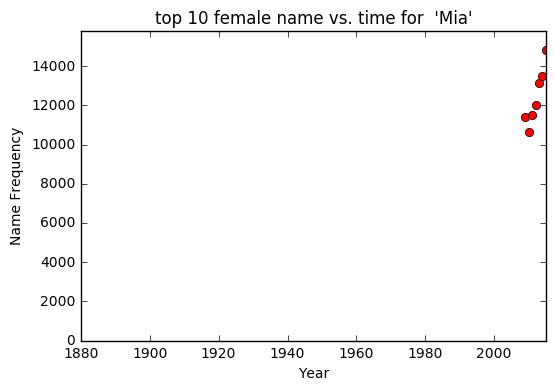

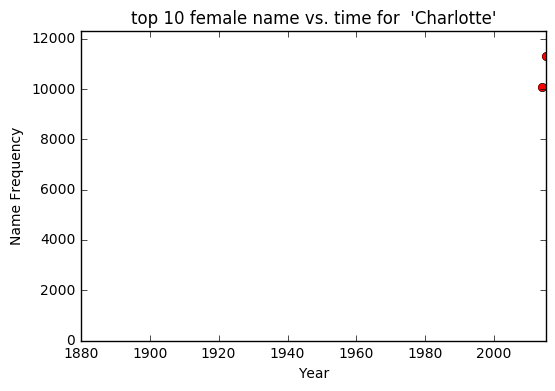

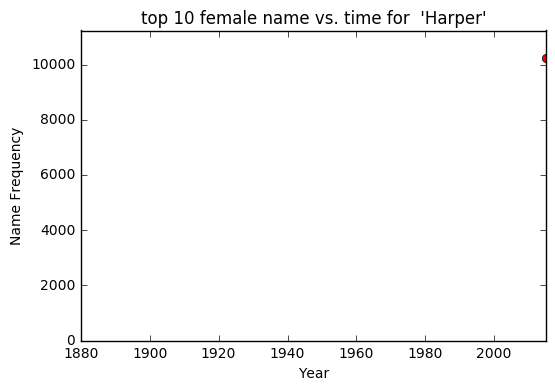

In [65]:
file_in2 = open('top10-f.csv', 'r')
max_times_top10 = []
name_count_heatmap = [] 
for i, j in enumerate(name_list):
    file_in2.seek(0,0)
    name_count = []
    for row in file_in2:
        row = row.replace('"', '').strip('\n').strip().split(',')
        if name_list[i] in row:
            name_index = row.index(name_list[i])
            name_count.append(row[name_index - 1])
        elif name_list[i] not in row:
            name_count.append('NaN')
    name_count_heatmap.append(name_count)
    name_count_int = []
    for count in name_count:
        if count != 'NaN':
            name_count_int.append(int(count))
    max_times_top10.append(len(name_count_int))

   #Now make the scatter plots
    pyl.figure(j)
    pyl.title('top 10 female name vs. time for %s' %(j))
    pyl.xlabel('Year')
    pyl.ylabel('Name Frequency')
    pyl.axis([1880, 2015, 0, max(name_count_int)+1000])
    pyl.plot(year, name_count, 'ro')
    
file_in2.close()

Using the matplotlib add_subplot() method I assigned varriables, ax1, ax2, ax3 and ax4 to a particular position in a 2x2 plot. ax1 = fig.add_subplot(2, 2, 1) assigns ax1 to be the first (left hand corner). the first two arguments (2, 2) represent the plot dimensions and the  third argument is the position of the plot with 1 being first and in the top left corner. I wanted automate the plot making so I made a list equal to these variables that I could iterate over later in a 'for-loop' (axis_list = [ax1, ax2, ax3, ax4]).

This time I iterated over the first four names in the name list. Equal to the amount of plots I planned on making (for i, j in enumerate(name_list[0:4]):).

With file_in2.seek(0,0) I make sure that python goes back to the begining of the csv file for each name in name_list. I want the heatmap list to be a list of lists containing the counts for each name in the same order of the names in name_list. For each name I go through the row in the csv file and use the index method to find the index of the name in the row (name_index = row.index(name_list[i]). I then appended the counts for that name by subtracting one from the name_index. If the name is not in the row I appended 'NaN'. This is important because the matplotlib scatter plot function expects two lists of equal length. This way the year list and the name_count list match oneanother. The subplot() function will treat the 'NaN' values as missing data so that they are not ploted.

I also made a name_count_int list which was just the counts for each name without the 'NaN' values and strings converted to integers. I did this so that I could use the max() function of lists to set the y-axis limit

Since the values of i are 0, 1, 2, 3, I can also use this to slice the list containing the subplot objects ax1, ax2, ax3 and ax4. axis_list[i].set_xlabel('Year') sets the x label of each plot. The rest of the commands are used to make the plots look nicer.

I don't know about you, but I'm not going through every single plot. We can make a single plot that is more informative by giving us the general trend of when a person was in the top10 over time. To do this we will use the numpy module to make an array. pandas can also plot heatmaps but there are less options.

In [16]:
print name_count_heatmap[0:2]

[['1288', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '19978', '21017', '25747', '28171', '28482', '27229', '25875', '24877', '28146', '27884', '28358', '27790', '25810', '25228', '24633', '24248', '22281', '21369', '21029', '20694', '19873', '19088', '17689', '15889', '14752', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'N

In [12]:
for element in name_count_heatmap:
    for i in element:
        index = element.index(i)
        if i == 'NaN':
            element[index] = 0
        elif element[index] > 1:
            element[index] = 1
print name_count_heatmap[0:2]

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


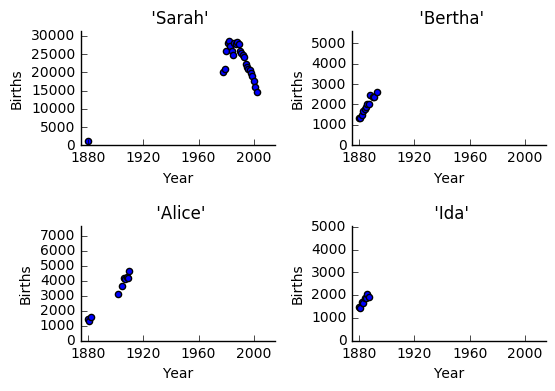

In [63]:
#scatter plots

#Make empty plots that we will add to later.
fig = pyl.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
axis_list = [ax1, ax2, ax3, ax4]

file_in2 = open('top10-f.csv', 'r')
#max_times_top10 = []
name_count_heatmap = [] 
for i, j in enumerate(name_list[0:4]):
    file_in2.seek(0,0)
    name_count = []
    for row in file_in2:
        row = row.replace('"', '').strip('\n').strip().split(',')
        if name_list[i] in row:
            name_index = row.index(name_list[i])
            name_count.append(int(row[name_index - 1]))
        elif name_list[i] not in row:
            name_count.append('NaN')
    name_count_heatmap.append(name_count)
    name_count_int = []
    for count in name_count:
        if count != 'NaN':
            name_count_int.append(int(count))
    #max_times_top10.append(len(name_count_int))
    axis_list[i].set_xlabel('Year')
    axis_list[i].set_ylabel('Births')
    axis_list[i].set_ylim([0, max(name_count_int)+3000])
    axis_list[i].set_xticks([1880, 1920, 1960, 2000])
    axis_list[i].set_xticklabels([1880, 1920, 1960, 2000])
    axis_list[i].get_xaxis().tick_bottom()
    axis_list[i].get_yaxis().tick_left()
    axis_list[i].set_xlim([1875, 2015])
    axis_list[i].set_title('%s' %(j))
    axis_list[i].spines["top"].set_visible(False)
    axis_list[i].spines["right"].set_visible(False)
    axis_list[i].scatter(year, name_count)
    pyl.subplots_adjust(wspace=0.4, hspace=0.7)
file_in2.close()

name_count_heatmap consisted of a list of lists. Each one contained the number of counts of the person in name_list for each year in the year list (starting in 1880). We could have used this for the heatmap but I felt that due to population growth it would be misleading. Since the popluation is growing we would really need to normalize to the population growth to compare values. But for an easy "yes", "no" answer we can subsitute 1 for positive values and 0 for missing values. 

Next we will create a numpy array out of the name_count_heatmap list. Usualy you would see this as np.array(list) to make an array from a heatmap because numpy is usually imported as, 'import numpy as np'. But I just imported pylab as pyl once so no need to import numpy separately. You will see pyl.array instead of np.array.

One thing to keep in mind is that unlike a list, an array has to be all of the same type. In this case these are all strings so numpy is o.k with this.

Now we will make a heatmap type of plot for all names that are in the top ten throughout time. To do this I will reset the name_count_heatmap list and include all names in it as before.

In [3]:
file_in3 = open('top10-f.csv', 'r')
name_count_heatmap = [] 
for i, j in enumerate(name_list):
    file_in3.seek(0,0)
    name_count = []
    for row in file_in3:
        row = row.replace('"', '').strip('\n').strip().split(',')
        if name_list[i] in row:
            name_index = row.index(name_list[i])
            name_count.append(int(row[name_index - 1]))
        elif name_list[i] not in row:
            name_count.append('NaN')
    name_count_heatmap.append(name_count)
    name_count_int = []
    for count in name_count:
        if count != 'NaN':
            name_count_int.append(int(count))
file_in3.close()

In [4]:
array_name_count_heatmap = pyl.array(name_count_heatmap)
print array_name_count_heatmap[0:2]

[['1288' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN'
  'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN'
  'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN'
  'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN'
  'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN'
  'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN'
  'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN'
  'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN'
  'NaN' 'NaN' '19978' '21017' '25747' '28171' '28482' '27229' '25875'
  '24877' '28146' '27884' '28358' '27790' '25810' '25228' '24633' '24248'
  '22281' '21369' '21029' '20694' '19873' '19088' '17689' '15889' '14752'
  'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN' 'NaN'
  'NaN']
 ['1320' '1324' '1508' '1681' '1789' '1860' '2001' '2037' '2450' 'NaN'
  '2388' '2372' 'NaN' '2623' 'NaN' 

In [5]:
for element in name_count_heatmap:
    for i in element:
        index = element.index(i)
        if i == 'NaN':
            element[index] = 0
        elif element[index] > 1:
            element[index] = 1
print name_count_heatmap[0:2]

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


name_count_heatmap consisted of a list of lists. Each one contained the number of counts of the person in name_list for each year in the year list (starting in 1880). We could have used this for the heatmap but I felt that due to population growth it would be misleading. Since the popluation is growing we would really need to normalize to the population growth to compare values. But for an easy "yes", "no" answer we can subsitute 1 for positive values and 0 for missing values. 

Next we will create a numpy array out of the name_count_heatmap list. Usualy you would see this as np.array(list) to make an array from a heatmap because numpy is usually imported as, 'import numpy as np'. But I just imported pylab as pyl once so no need to import numpy separately. You will see pyl.array instead of np.array.

One thing to keep in mind is that unlike a list, an array has to be all of the same type. In this case these are all strings so numpy is o.k with this.

In [6]:
array_name_count_heatmap = pyl.array(name_count_heatmap)
print array_name_count_heatmap[0:2]

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [7]:
array_name_count_heatmap.shape

(85, 136)

The length of the heatmap array the x dimension is 136, which is equal to the number of years. I want to make a list of every 10th year that I will use to place the ticks position.

In [8]:
rows = [i.replace('\'', '').replace(' ', '') for i in name_list]
print rows

['Sarah', 'Bertha', 'Alice', 'Ida', 'Margaret', 'Minnie', 'Elizabeth', 'Emma', 'Anna', 'Mary', 'Annie', 'Clara', 'Florence', 'Bessie', 'Ethel', 'Helen', 'Ruth', 'Marie', 'Lillian', 'Mildred', 'Dorothy', 'Frances', 'Evelyn', 'Virginia', 'Betty', 'Doris', 'Barbara', 'Shirley', 'Patricia', 'Joan', 'Nancy', 'Carol', 'Judith', 'Sandra', 'Linda', 'Carolyn', 'Sharon', 'Susan', 'Donna', 'Kathleen', 'Deborah', 'Karen', 'Debra', 'Pamela', 'Cynthia', 'Lisa', 'Lori', 'Tammy', 'Kimberly', 'Angela', 'Jennifer', 'Michelle', 'Melissa', 'Laura', 'Amy', 'Tracy', 'Julie', 'Nicole', 'Heather', 'Stephanie', 'Rebecca', 'Amanda', 'Jessica', 'Kelly', 'Crystal', 'Ashley', 'Megan', 'Brittany', 'Samantha', 'Lauren', 'Emily', 'Taylor', 'Hannah', 'Rachel', 'Alexis', 'Madison', 'Olivia', 'Abigail', 'Isabella', 'Ava', 'Sophia', 'Chloe', 'Mia', 'Charlotte', 'Harper']


Above I used a list comprehension and the string replace method to get rid of the ugly quotes and spaces around the names in name_list. I will use these names for the x-axis of the heatmap. I will do something similar for the x-axis where I want the years to be integers not strings. Every year is a little much so I slice the list with a stride length of 10.

In [10]:
columns = [int(i) for i in year][::10]
print columns

[1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]


In [11]:
ticks = range(len(year))[::10]
print ticks


[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]


As in the plots above, I will make plots using an object orientated method rather than a procedural method as it gives more flexibility over the plot. First create the figure object with heatmapfig = pyl.figure(). Then we can use the subplots() method. We are not going to make more then one plot but the subplots method gives more versatility to label positioning and the like. I am indebted for the useful information I got from, http://stackoverflow.com/questions/14391959/heatmap-in-matplotlib-with-pcolor and http://www.bertplot.com/visualization/?p=292

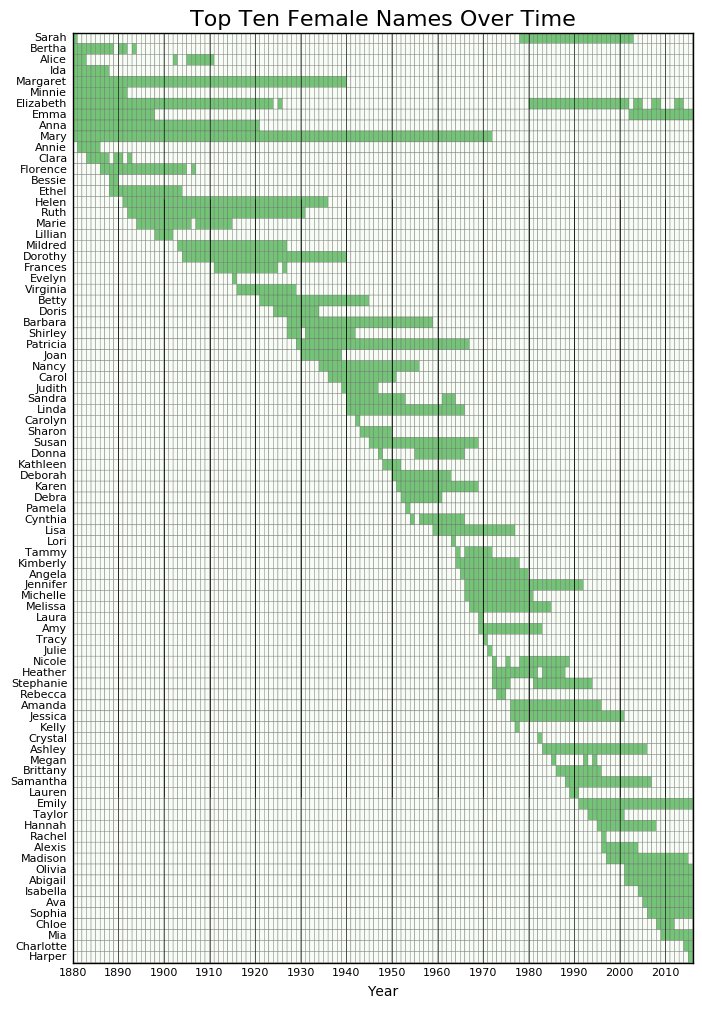

In [14]:
heatmapfig = pyl.figure()
heatmapfig, ax = pyl.subplots(figsize = (8, 12))
ax.pcolor(array_name_count_heatmap, vmin = 0, vmax = 2, \
cmap = pyl.cm.Greens, edgecolors='0.4') 
ax.set_xticks(pyl.array(ticks))
ax.set_yticks(pyl.array(range(len(rows)*5))+0.5)
ax.set_xticklabels(columns, minor=False, fontsize = '8')
ax.set_yticklabels(rows, minor=False, fontsize = '8')
ax.set_xlabel('Year')
ax.yaxis.set_ticks_position('none')
ax.axis([min(ticks), (max(ticks)+6), 0, len(rows)]) 
ax.tick_params('x', length=550, width=0.4, which='major')
ax.set_title('Top Ten Female Names Over Time', fontsize = '15')
text = ax.title
font = plt.font_manager.FontProperties(family='sans-serif',\
size = 16)
text.set_font_properties(font)
ax.invert_yaxis()
pyl.savefig('female_names.png', dpi = 400, bbox_inces='tight')

We get a plot with names on the x-axis and years on the y-axis. The green values tell us whether this name was in the top ten for a given year. After creating the figure object we can use the subplot method. Changing the figure size form the default to 8 inches in the x axis and 12 inches in the y-axis. Without this, the plot is compressed and the names run together. I then create an ax object that uses subplot. Calling the matlabplot pcolor() function will plot the heatmap array. The vmin argument sets the lowest value to be assigned to one end of the color map spectrum and the highest value to be assigned to the highest end of the color map. I assigned vmax=2 so that I wouldn't get such a dark color. Since my max value is 1 I will only see the middle green of the green color spectrum in the green color map (cmap = pyl.cm.Greens). finally, I wanted the edge of the boxes to be grey so I set edgecolors='0.4'. Values betwen 0-1 will give black-light grey colors.